# NGSA English P1 - Exploratory Data Analysis
**~ Author:** Ezra Minty

## Introduction

This notebook explores **NGSA English Paper 1** exam data across **10 years** *(2010, 2011, 2013, 2016, 2018, 2019, 2020, 2021, 2022 and 2024)*, focusing on how exam questions have evolved over time. Until I have access to student response data, the goal is to uncover patterns and insights hidden in the questions themselves **(40 questions per exam, thus, 400 total)**. By studying the structure, wording, and design of these items, we can gain meaningful insights into how the exam reflects shifts in educational priorities, language use, and assessment strategies.

**Specifically, this analysis looks at:**

- **Trends in Topics**

  Examining which skills (e.g., spelling, vocabulary, grammar, comprehension) are emphasized more or less over time, helping reveal shifts in curriculum focus.

- **Vocabulary Frequency**

  Identifying the most common words that appear in questions and tracking how their frequency changes year by year, which can show evolving linguistic or cultural emphasis.

- **Correct Answer Distribution**

  Checking whether answer keys favor certain options (A, B, C, or D), ensuring exams are statistically balanced and free from hidden biases.

Through these perspectives, this notebook aims to provide a data-driven view of how English assessment has developed over the past decade, highlighting trends that matter for educators, exam designers, and students preparing for the NGSA.

## Setup

In [2]:
# Import necessary packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import warnings
from IPython.display import display, HTML

In [3]:
# Load NGSA-English Test Dataset
test_data = pd.read_json("../data/english/ngsa-english-dataset-tests.json")

# Load NGSA-English Questions Dataset
question_data = pd.read_json("../data/english/ngsa-english-dataset-qa-full.json")

In [4]:
test_data

,_id,subject,level,paper_type,year,question_ids,created_at,updated_at
0,{'$oid': '66d0d0000000000000000000'},English,NGSA,Paper 1,2010,"[{'$oid': '66d0d0010000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
1,{'$oid': '66d0d0000000000000000062'},English,NGSA,Paper 1,2016,"[{'$oid': '66d0d0020000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
2,{'$oid': '66d0d0000000000000000063'},English,NGSA,Paper 1,2018,"[{'$oid': '66d0d0030000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
3,{'$oid': '66d0d0000000000000000064'},English,NGSA,Paper 1,2019,"[{'$oid': '66d0d0040000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
4,{'$oid': '66d0d0000000000000000065'},English,NGSA,Paper 1,2020,"[{'$oid': '66d0d0050000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
5,{'$oid': '66d0d0000000000000000066'},English,NGSA,Paper 1,2021,"[{'$oid': '66d0d0060000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
6,{'$oid': '66d0d0000000000000000067'},English,NGSA,Paper 1,2022,"[{'$oid': '66d0d0070000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
7,{'$oid': '66d0d0000000000000000013'},English,NGSA,Paper 1,2013,"[{'$oid': '66d0d0130000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
8,{'$oid': '66d0d0000000000000000024'},English,NGSA,Paper 1,2024,"[{'$oid': '66d0d0240000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}
9,{'$oid': '66f0d0000000000000000001'},English,NGSA,Paper 1,2011,"[{'$oid': '66f0d0010000000000000001'}, {'$oid'...",{'$date': '2025-06-28T00:00:00.000Z'},{'$date': '2025-06-28T00:00:00.000Z'}


In [5]:
question_data.head()

,_id,test_id,number,correct_option,options,question_diagram,question_text,context,instruction
0,{'$oid': '66d0d0010000000000000001'},{'$oid': '66d0d0000000000000000000'},1,B,"{'A': 'telivision', 'B': 'television', 'C': 't...",,I am not allowed to watch _____ during the week.,"{'type': 'none', 'content': ''}","In questions 1 to 3, choose the correct spelli..."
1,{'$oid': '66d0d0010000000000000002'},{'$oid': '66d0d0000000000000000000'},2,A,"{'A': 'religious', 'B': 'religous', 'C': 'rele...",,Mr. Joseph is a very _____ man.,"{'type': 'none', 'content': ''}","In questions 1 to 3, choose the correct spelli..."
2,{'$oid': '66d0d0010000000000000003'},{'$oid': '66d0d0000000000000000000'},3,A,"{'A': 'cemetery', 'B': 'cemetary', 'C': 'cemet...",,It can be dangerous walking through the _____ ...,"{'type': 'none', 'content': ''}","In questions 1 to 3, choose the correct spelli..."
3,{'$oid': '66d0d0010000000000000004'},{'$oid': '66d0d0000000000000000000'},4,B,"{'A': 'amused', 'B': 'amazed', 'C': 'happy', '...",,John was [surprised] when he won the lottery.,"{'type': 'none', 'content': ''}","In questions 4 to 6, choose the word that has ..."
4,{'$oid': '66d0d0010000000000000005'},{'$oid': '66d0d0000000000000000000'},5,A,"{'A': 'harmony', 'B': 'happiness', 'C': 'disco...",,The great speaker advised the members of the t...,"{'type': 'none', 'content': ''}","In questions 4 to 6, choose the word that has ..."


In [6]:
# Flatten question test_id
question_data["test_id"] = question_data["test_id"].apply(lambda x: x.get("$oid") if isinstance(x, dict) else x)

# Flatten tests _id
test_data["_id"] = test_data["_id"].apply(lambda x: x.get("$oid") if isinstance(x, dict) else x)

# Suppress Warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
data = question_data.merge(
    test_data[["_id", "year"]],
    left_on="test_id",
    right_on="_id",
    how="left"
)

# Drop redundant _id column from test_data
data.drop(columns=["_id_y"], inplace=True)

## Trends In Topics

In [8]:
# Categorize Question and Instruction
def categorize_question(instruction, text):
    text = (instruction or "") + " " + (text or "")
    text = text.lower()
    
    # Spelling / word recognition
    if any(kw in text for kw in ["spelling", "correct spelling", "choose the correct word", "misspelt", "correctly spelt"]):
        return "Spelling"
    
    # Vocabulary: synonyms / antonyms / meaning of words
    elif any(kw in text for kw in ["similar", "same meaning", "opposite", "synonym", "antonym", "meaning of the word", "means the same"]):
        return "Vocabulary"
    
    # Grammar: verbs, tenses, punctuation, sentence completion
    elif any(kw in text for kw in ["prefix", "suffix", "complete the sentence", "complete each sentence", "verb", "tense", "punctuation", "fill in the blank", "correct form", "correctly written", "apostrophe", "function of the word", "capital letter", "part of speech", "conjunction", "adverb", "adjective", "noun", ]):
        return "Grammar"
    
    # Comprehension: passages, reading, questions about text meaning
    elif any(kw in text for kw in ["most suitable meaning", "passage", "read", "questions on the passage", "answer the following", "meaning of the underlined phrase", "poem", "scenario", "most suitable word", "proverb"]):
        return "Comprehension"
        
    # Reference skills
    elif any(kw in text for kw in ["directory", "alphabetical", "table", "table of contents", "dictionary"]):
        return "Reference Skills"
    
    # Other / miscellaneous
    else:
        return "Other"

data["category"] = data.apply(lambda row: categorize_question(row.get("instruction",""), row.get("question_text","")), axis=1)

In [9]:
# Group by year and category
category_trends = data.groupby(["year", "category"]).size().reset_index(name="count")

In [10]:
print(category_trends)

    year          category  count
0   2010     Comprehension     10
1   2010           Grammar     13
2   2010             Other      7
3   2010  Reference Skills      1
4   2010          Spelling      3
5   2010        Vocabulary      6
6   2011     Comprehension      9
7   2011           Grammar     15
8   2011  Reference Skills      6
9   2011          Spelling      5
10  2011        Vocabulary      5
11  2013     Comprehension     12
12  2013           Grammar     17
13  2013             Other      2
14  2013  Reference Skills      4
15  2013          Spelling      3
16  2013        Vocabulary      2
17  2016     Comprehension     12
18  2016           Grammar     19
19  2016             Other      1
20  2016  Reference Skills      2
21  2016          Spelling      3
22  2016        Vocabulary      3
23  2018     Comprehension     11
24  2018           Grammar     17
25  2018             Other      2
26  2018  Reference Skills      1
27  2018          Spelling      6
28  2018      

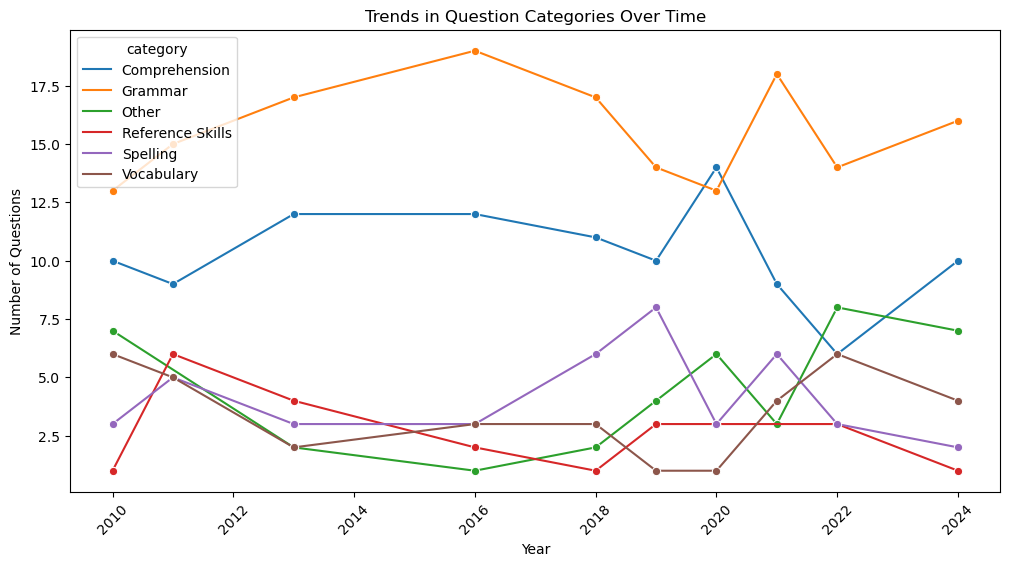

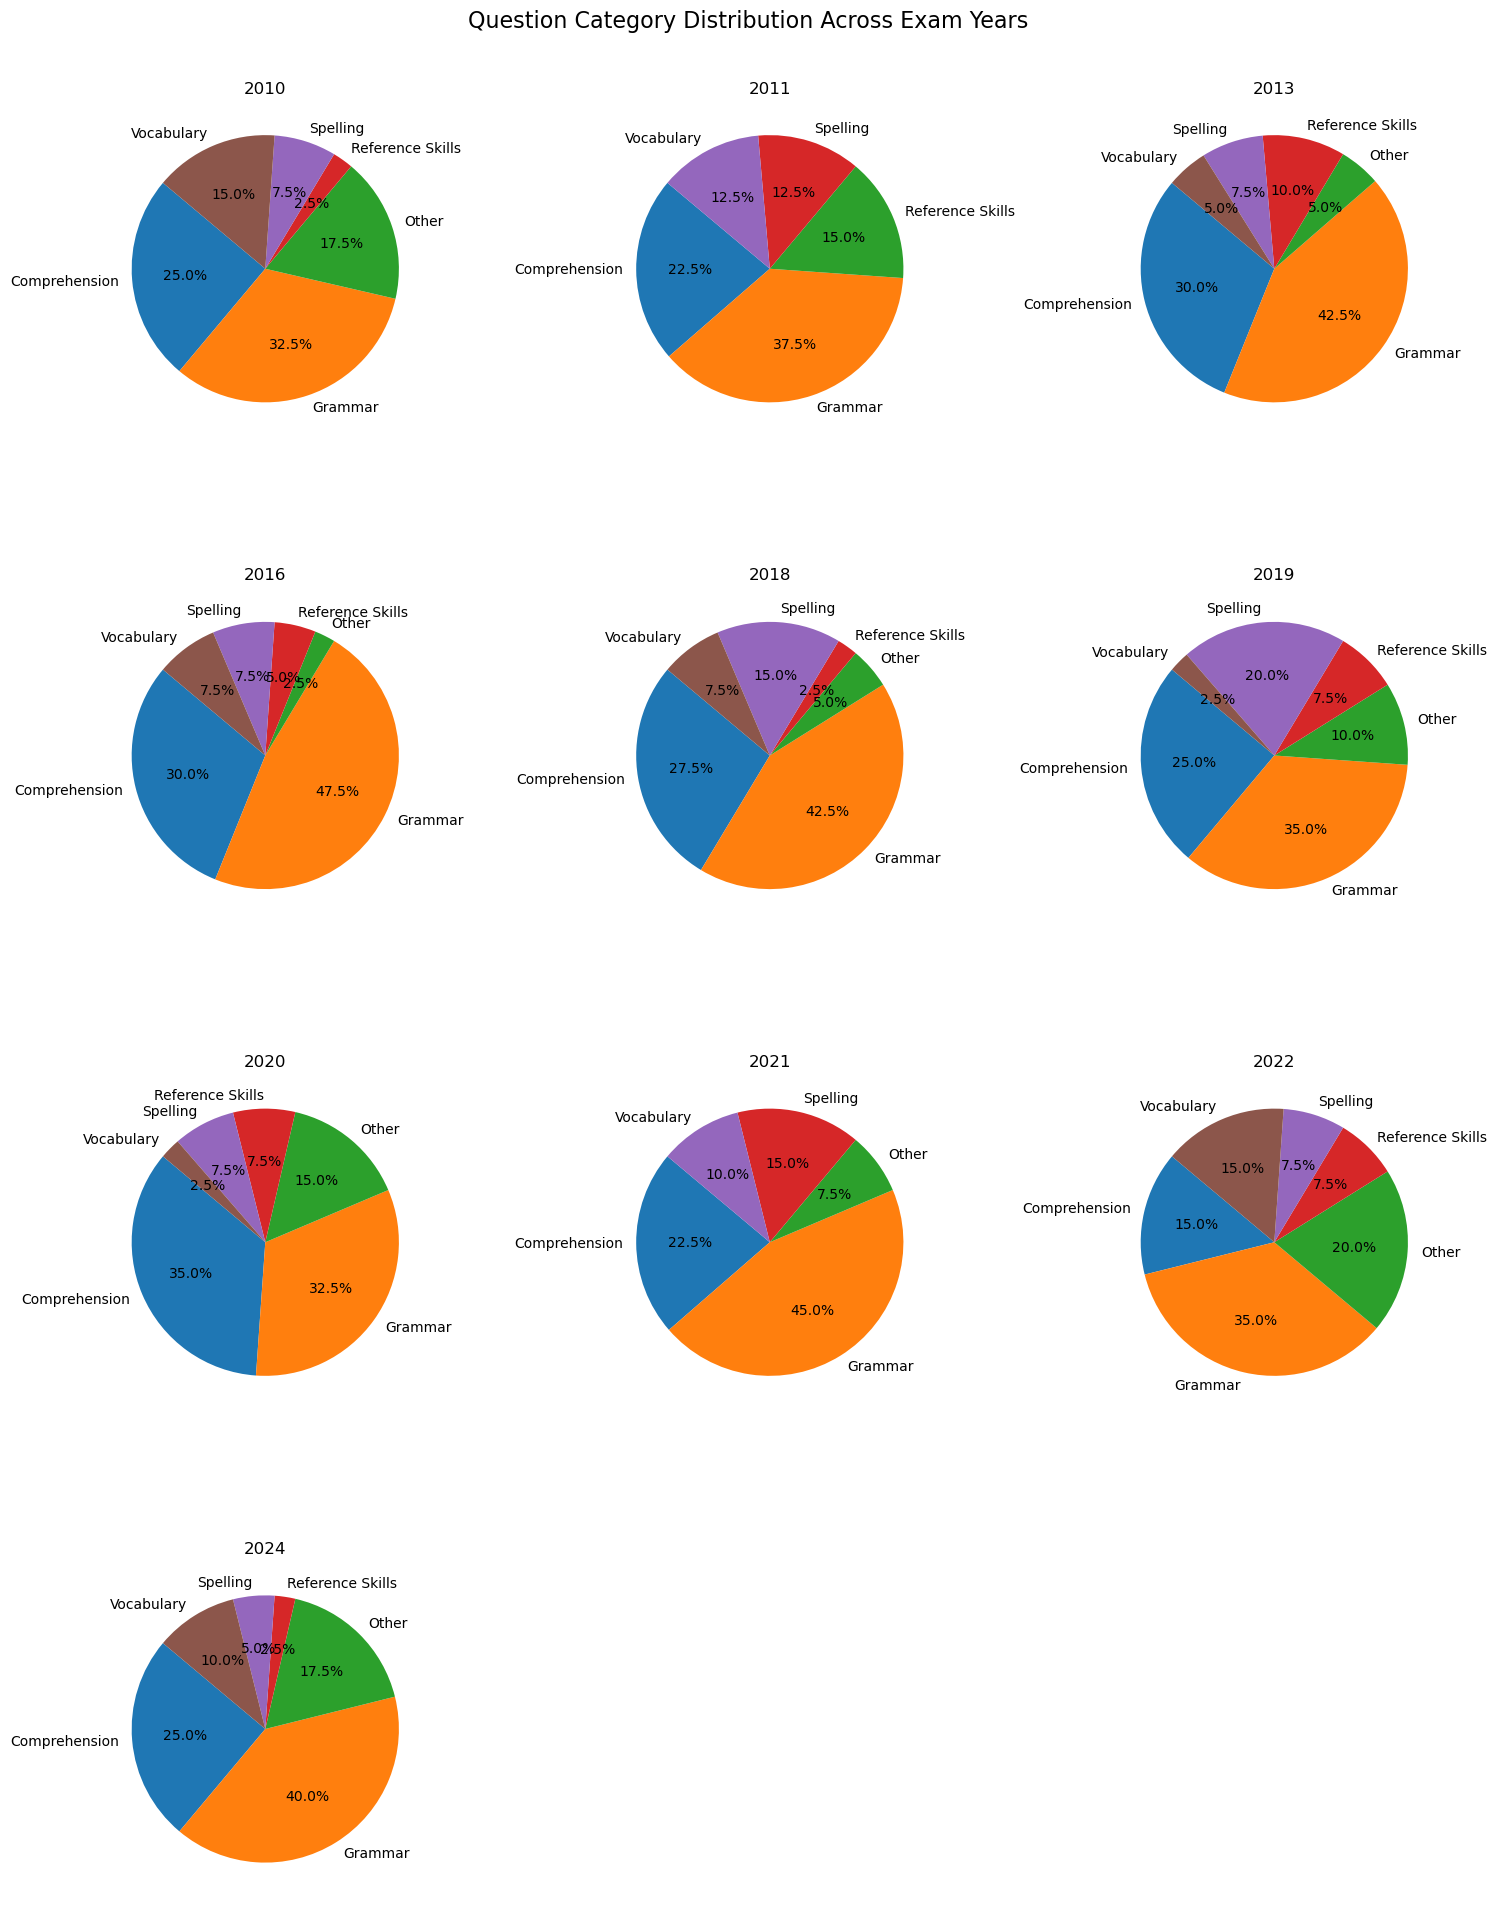

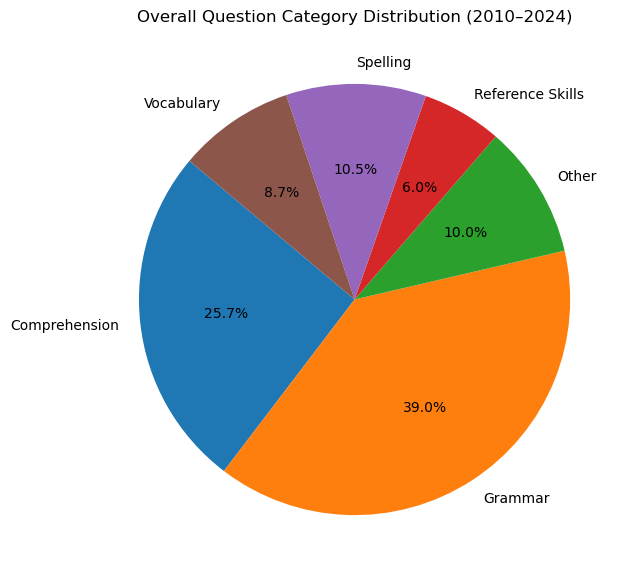

In [11]:
# Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=category_trends,
    x="year",
    y="count",
    hue="category",
    marker="o"
)

plt.title("Trends in Question Categories Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.show()

# Get all unique years sorted
years_to_plot = sorted(category_trends['year'].unique())

# Create subplots grid
n_years = len(years_to_plot)
cols = 3
rows = (n_years // cols) + (1 if n_years % cols != 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, yr in enumerate(years_to_plot):
    # Filter year data
    year_data = category_trends[category_trends['year'] == yr]

    # Plot pie chart
    axes[i].pie(
        year_data['count'],
        labels=year_data['category'],
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(f"{yr}")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Question Category Distribution Across Exam Years", fontsize=16)
plt.tight_layout()
plt.show()

# Sum counts across all years
total_category_counts = category_trends.groupby("category")["count"].sum().reset_index()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    total_category_counts["count"],
    labels=total_category_counts["category"],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Overall Question Category Distribution (2010–2024)")
plt.show()

### Analysis

The line graph above illustrates the number of questions in each exam year that fall into one of **six** categories: **Comprehension, Grammar, Reference Skills, Spelling, Vocabulary, and Other** (which includes questions not covered by the first five groups). The **x-axis** represents the exam years, while the **y-axis** shows the total number of questions from each paper belonging to the respective categories.

Alongside the line graph, pie charts are provided to show the distribution of categories for selected years, as well as one final pie chart that summarizes the overall category distribution across all ten years of data.

From the analysis, it is evident that **Grammar** is the most frequently tested category, accounting for **39.0%** of all questions. Its highest concentration occurred in **2016**, with **18** out of 40 questions focusing on Grammar. Conversely, its lowest representation was recorded in both **2010** and **2020**, with only **13** questions each year.

**Comprehension** follows as the second most tested category, representing **25.7%** of the total coverage. Its lowest occurrence was in **2022**, with just **6** questions. Notably, in **2020**, Comprehension surpassed Grammar, with **14** questions compared to Grammar’s **13**, making it the primary focus of that year’s paper.

Finally, the least tested category was **Reference Skills**, which accounted for only **6.0%** of the total distribution. Its highest concentration was observed in **2011**, when it represented **15%** of that year’s exam, with **6** out of 40 questions.

Overall, the data highlights a strong emphasis on **Grammar and Comprehension** throughout the ten-year span, while categories such as Reference Skills, Spelling, and Vocabulary played a smaller but still notable role. This suggests that while language fundamentals remain the dominant focus of the exam, less frequent categories contribute to maintaining balance and diversity in assessment.

## Vocabulary Frequency

In [12]:
import string
from collections import Counter
from nltk.corpus import stopwords
import nltk

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return words

data['words'] = data['question_text'].apply(lambda x: clean_text(x))

In [13]:
# Explode words into separate rows
word_data = data.explode('words')

# Count frequency of each word per year
word_counts = word_data.groupby(['year','words']).size().reset_index(name='count')

In [14]:
top_words_per_year = word_counts.groupby('year').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)

In [18]:
# Words to track
words_to_plot = words_to_track = [
    "school", "teacher", "student",  # education focus
    "class", "exam", "reading", "writing",  # classroom activities
    "friend", "family", "parent", "brother", "sister",  # social/family themes
    "help", "play", "learn", "study", "work",  # verbs often used in questions
    "honesty", "kindness", "respect", "teamwork",  # moral/cultural themes
    "problem", "solution", "question", "answer",  # critical thinking
    "book", "story", "poem", "passage",  # literature-related words
]

filtered = word_counts[word_counts['words'].isin(words_to_plot)]

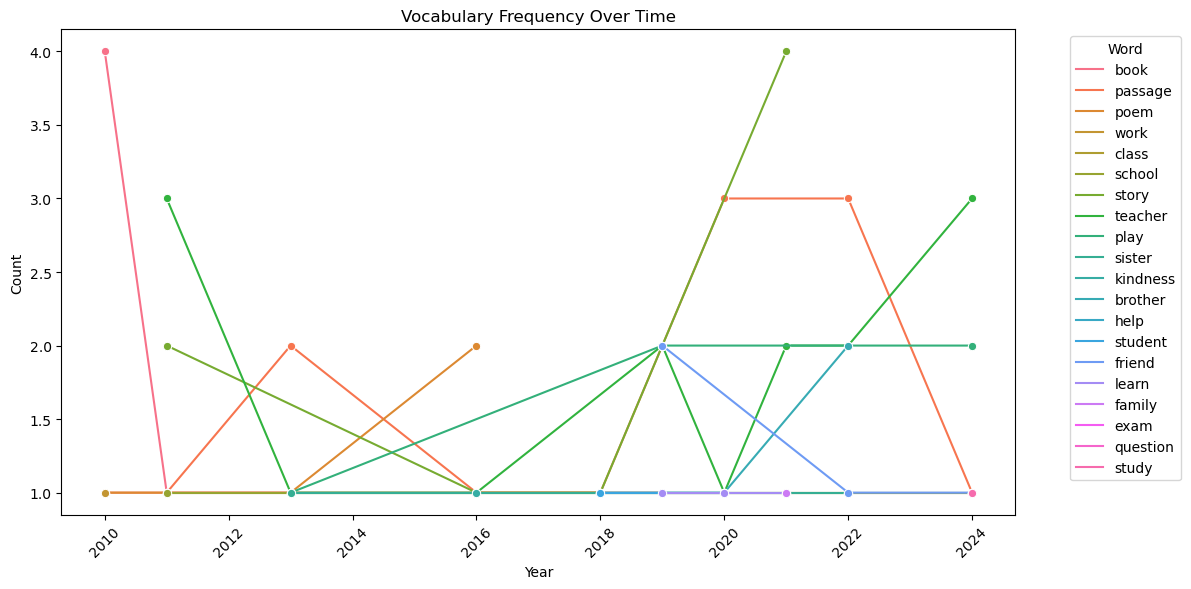

In [19]:
# Plot Vocabulary Frequency Graph
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='year', y='count', hue='words', marker='o')
plt.title("Vocabulary Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Word", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

### Analysis

The line graph above shows the **frequency of twenty selected vocabulary words** from **2010 to 2024**. The **x-axis** represents years, while the **y-axis** shows word counts, with each line representing a distinct word.

**School-related** terms such as **student, teacher, school, class, and exam** appear consistently, with student peaking at **4** occurrences in **2018** and teacher remaining steady at **2–3 per year**. **Emotive and relational words** like **kindness, help, friend, family, sister, and brother** show more sporadic trends, with brief spikes in **2015–2017** and family reaching its highest count in **2020**.

**Literary terms** such as **poem, passage, story, and play** fluctuate, with poem and story declining after **2015** and passage remaining low, suggesting a shift from traditional literary analysis. **Academic verbs** like **learn and study** maintain moderate presence, with learn peaking in **2016** and study showing a gradual increase toward **2024**, reflecting growing attention to metacognitive skills.

Overall, the graph highlights a **balance** between **academic, relational, and literary vocabulary**, with student, teacher, and school as the most consistently used terms, indicating a sustained focus on **core educational concepts** alongside **evolving pedagogical** priorities.

## Correct Answer Distribution

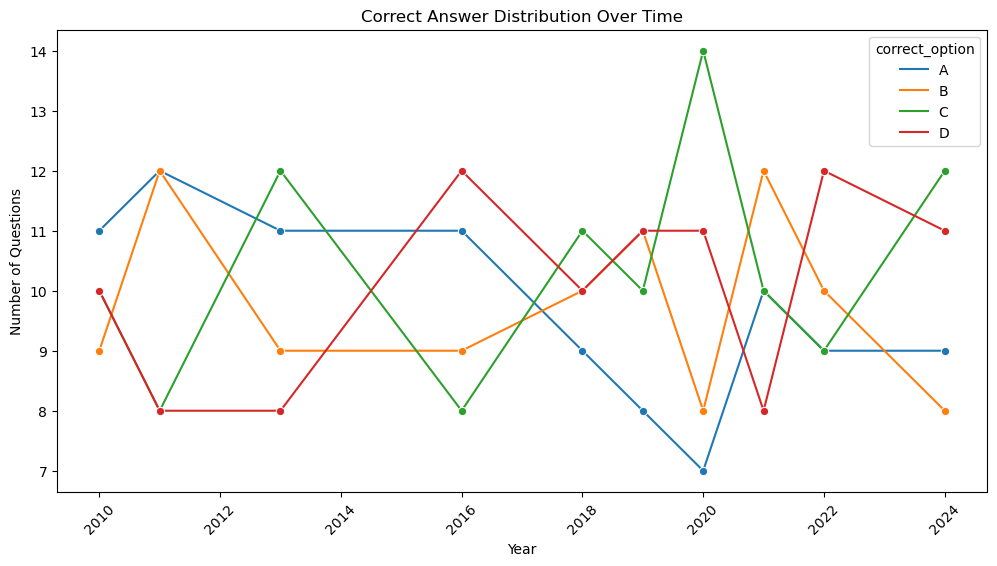

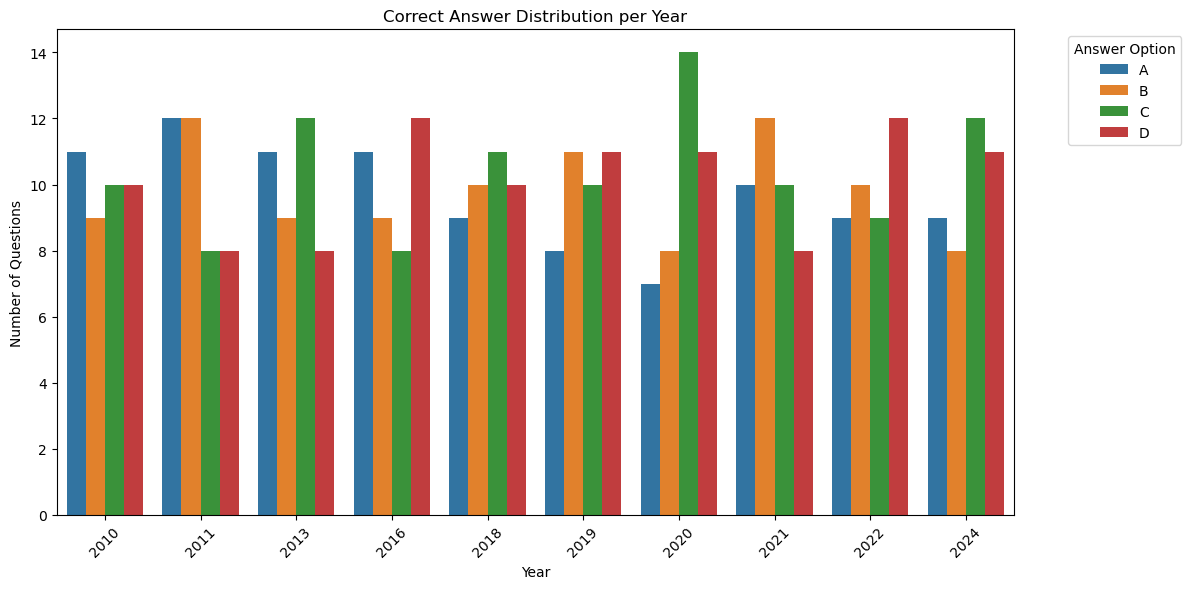

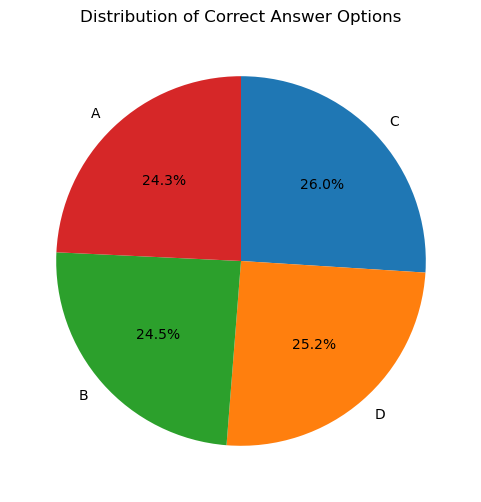

In [17]:
# Group by year and correct answer
answer_trends = data.groupby(["year", "correct_option"]).size().reset_index(name="count")

# Plot Correct Answer Distribution Graph
plt.figure(figsize=(12,6))
sns.lineplot(
    data=answer_trends,
    x="year",
    y="count",
    hue="correct_option",
    marker="o"
)

plt.title("Correct Answer Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.show()

# Plot Correct Answer Distribution Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(
    data=answer_trends,
    x="year",
    y="count",
    hue="correct_option"
)
plt.title("Correct Answer Distribution per Year")
plt.xlabel("Year")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)

# Move legend to the right side
plt.legend(title='Answer Option', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Count correct options
option_counts = data['correct_option'].value_counts().reset_index()
option_counts.columns = ['correct_option', 'count']

# Calculate percentage
option_counts['percent'] = (option_counts['count'] / option_counts['count'].sum()) * 100

# Plot Correct Answer Distribution Chart
plt.figure(figsize=(6,6))
plt.pie(
    option_counts['count'],
    labels=option_counts['correct_option'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Distribution of Correct Answer Options")
plt.show()

### Analysis

The line graph above illustrates the **Correct Answer Distribution** over time. The **x-axis** represents **exam years**, while the **y-axis** shows the total number of questions corresponding to each answer option (**A, B, C,** and **D**).

In addition to the line graph, a bar chart and pie chart are provided, showing the exact distribution of correct answers for each year and the overall percentage spread of each option across all **ten years**, respectively.

Examining answer option **A**, it is the least frequently occurring, accounting for **24.3%** of all correct answers over the ten-year period. Its highest frequency was in **2011**, with **12 out of 40 questions**, and its lowest was in **2020**, with **7 out of 40 questions**.

Answer option **B** is slightly more frequent than A, at **24.5%** overall. Its highest frequency years were **2011** and **2021**, each with **12 out of 40 questions**, and its lowest frequency years were **2020** and **2024**, each with **8 out of 40 questions**.

Answer option **C** is the most frequent, representing **26.0%** of correct answers. Its peak occurred in **2020**, with **14 out of 40 questions**, while it was least frequent in **2011** and **2016**, with **8 out of 40 questions** in each year. Clearly, **C likes to make its presence felt**.

Finally, answer option **D** accounts for **25.2%** of correct answers, making it the second most frequent option. Its peak years were **2016** and **2022**, each with **12 out of 40 questions**, and its lowest frequency occurred in **2011, 2013,** and **2021**, with **8 out of 40 questions** in each year.

Over the past ten years, the distribution of correct answer options has been surprisingly balanced, hovering between roughly **24–26%** for each choice. This suggests careful exam design to ensure fairness (**no option is playing favorites**). So, if you ever find yourself stuck on a question with no clue, you might just follow the old adage: **when in doubt, pick C**, it’s been holding strong fr a decade :)


## Conclusion


The analysis of past exam papers reveals clear patterns in both topic emphasis and answer distributions. Core areas such as **Comprehension, Grammar, and Vocabulary** consistently dominate the question sets, underscoring their central role in language assessment, while categories like **Spelling** and **Reference Skills** appear less frequently, reflecting their supporting role. Correct answer choices also display a remarkably balanced spread, with each option (**A, B, C, D**) accounting for approximately **24–26%** of correct responses over the ten-year period. This even distribution suggests intentional exam design to minimize bias and maintain fairness across questions.  

The vocabulary frequency trends further reinforce these findings, showing a sustained emphasis on **school-related terms** such as *student, teacher,* and *school,* alongside shifts in literary and relational vocabulary. This balance highlights an exam structure that both prioritizes core educational concepts and adapts to evolving pedagogical directions.  

Looking ahead, access to **student response data** would allow for deeper insights into areas such as common misconceptions, option-selection biases, and the relationship between vocabulary use and student performance. Such analysis could reveal not only how exams are designed, but also how students interact with them in practice. Future work will aim to expand on these findings, integrating additional data sources and extending coverage to uncover richer, more actionable insights into exam design, student learning, and assessment effectiveness.
